<a href="https://colab.research.google.com/github/saki601/machine-learning-class/blob/main/AI_finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import display, HTML
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns,logging, numpy as np

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ipywidgets as widgets

plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/asura/crop_yield.csv')
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


# Check dataframe: data

In [ ]:
len(data.columns)

10

In [ ]:
display(data.info())
display(HTML('<hr>'))
display(data.describe())
display(HTML('<hr>'))
print('Number of uplicated Rows:',data.duplicated().sum())
display(HTML('<hr>'))
print('Number of Null Values:\n',print(data.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


None

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


Number of uplicated Rows: 0


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64
Number of Null Values:
 None


In [ ]:
data.dropna(inplace=True)

# Data Exploration

In [ ]:
sampled_data = data.sample(n = 1000, random_state=42)

In [ ]:
display(HTML('<h1><b>Categorical Data</b></h1>'))
display(HTML('<hr>'))
print('Region:', ', '.join(data['Region'].unique()))
display(HTML('<hr>'))
print('Soil Type:', ', '.join(data['Soil_Type'].unique()))
display(HTML('<hr>'))
print('Crop:', ', '.join(data['Crop'].unique()))
display(HTML('<hr>'))
print('Weather Conditions:', ', '.join(data['Weather_Condition'].unique()))
display(HTML('<hr>'))

Region: West, South, North, East


Soil Type: Sandy, Clay, Loam, Silt, Peaty, Chalky


Crop: Cotton, Rice, Barley, Soybean, Wheat, Maize


Weather Conditions: Cloudy, Rainy, Sunny


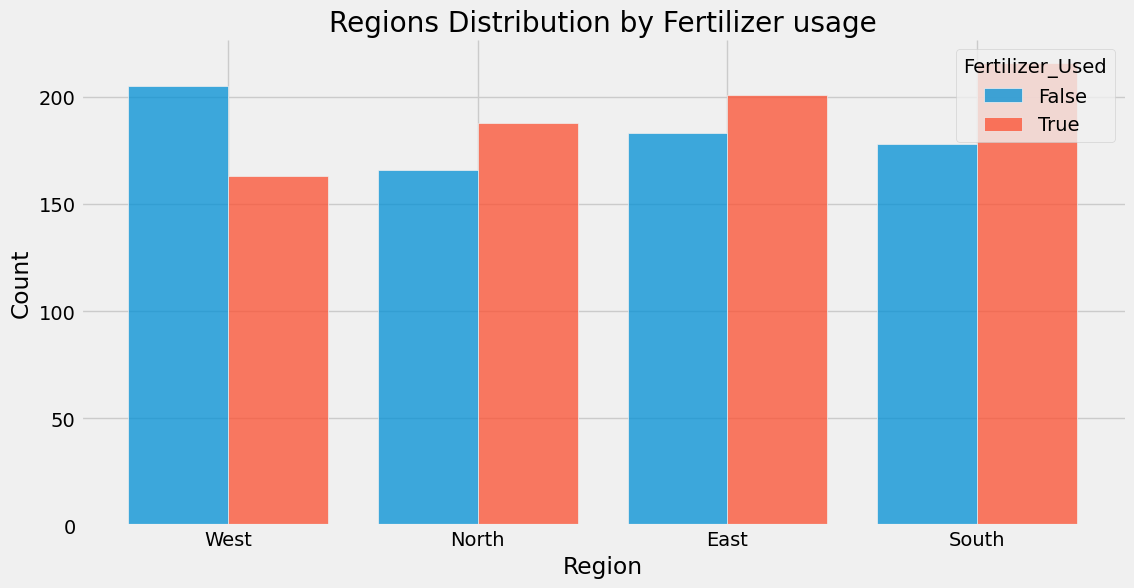

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=sampled_data,
    x='Region',
    hue='Fertilizer_Used',
    multiple='dodge',
    shrink=0.8,
)
plt.title('Regions Distribution by Fertilizer usage')
plt.xlabel('Region')
plt.ylabel('Count')
sns.despine()
plt.show()

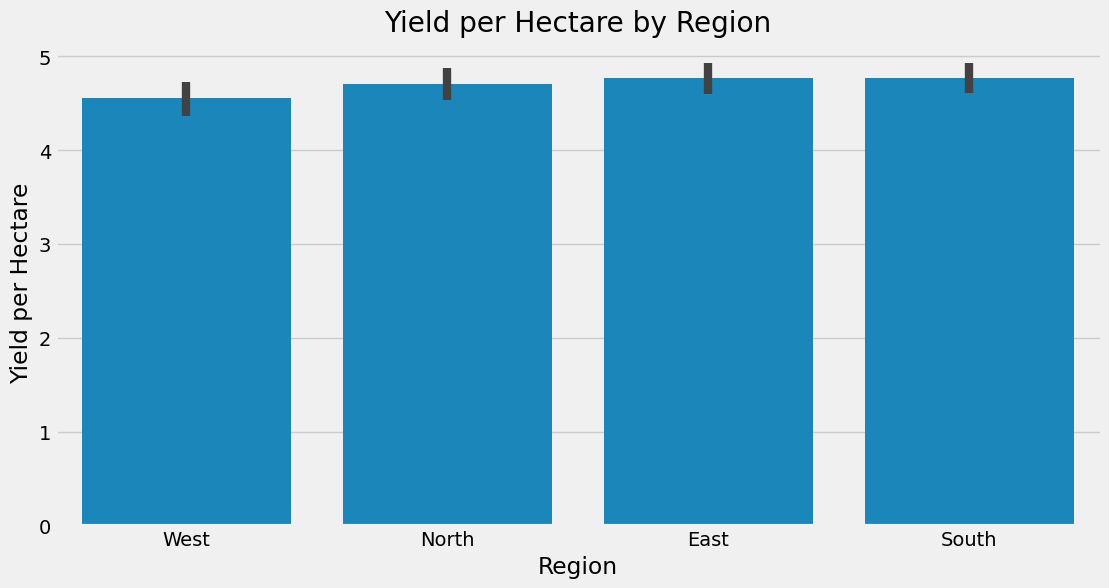

In [ ]:
# prompt: generate a barcart yield per hectar  and region

plt.figure(figsize=(12, 6))
sns.barplot(data=sampled_data, x='Region', y='Yield_tons_per_hectare')
plt.title('Yield per Hectare by Region')
plt.xlabel('Region')
plt.ylabel('Yield per Hectare')
sns.despine()
plt.show()

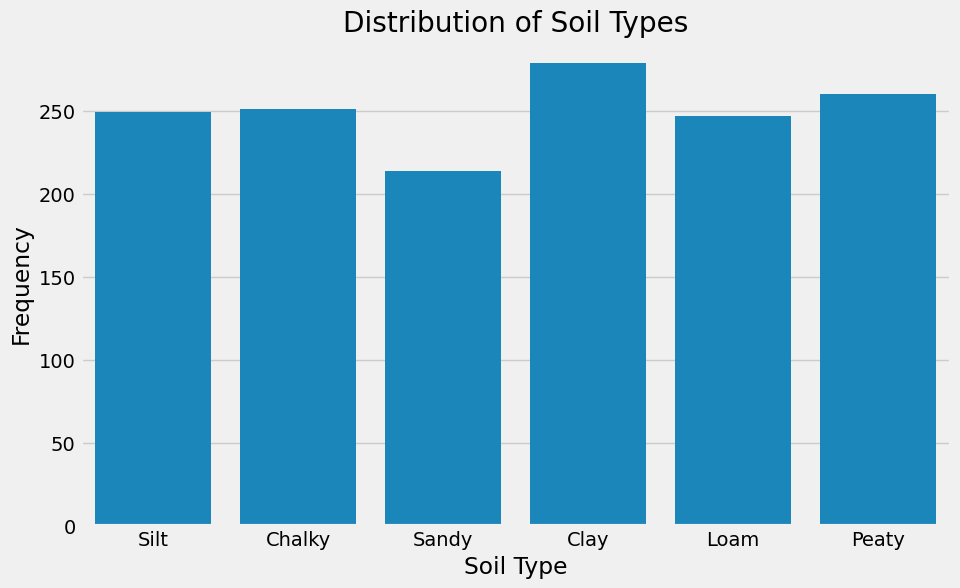

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sampled_data, x='Soil_Type')
plt.title('Distribution of Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Frequency')
plt.show()

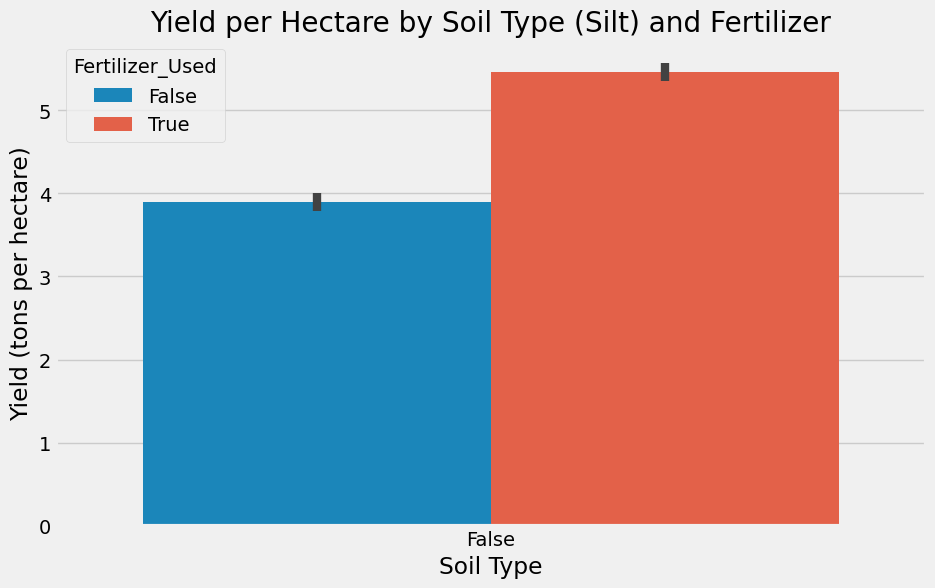

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sampled_data, x=data['Soil_Type'] == 'silt', y='Yield_tons_per_hectare', hue='Fertilizer_Used') # Changed silt to 'silt'
plt.title('Yield per Hectare by Soil Type (Silt) and Fertilizer')
plt.xlabel('Soil Type')
plt.ylabel('Yield (tons per hectare)')
plt.show()

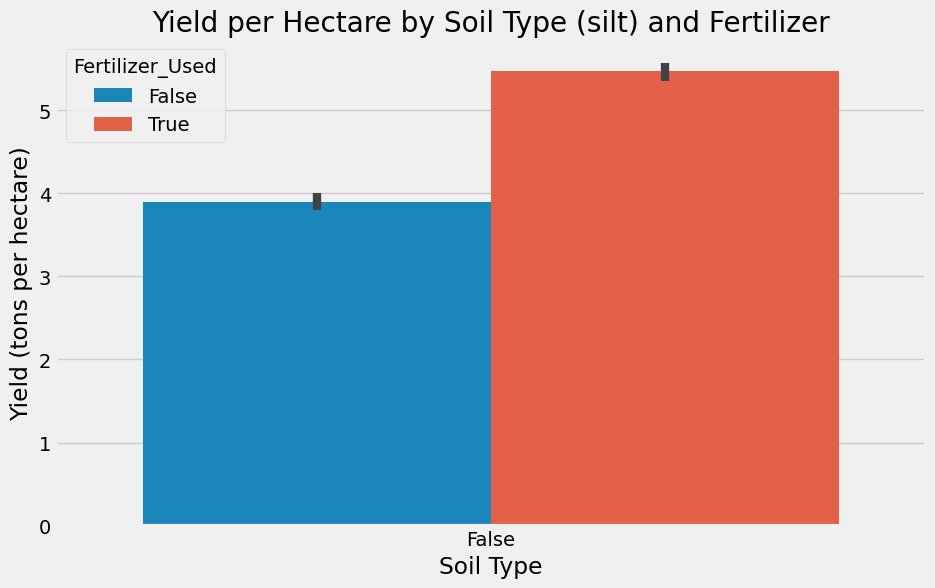

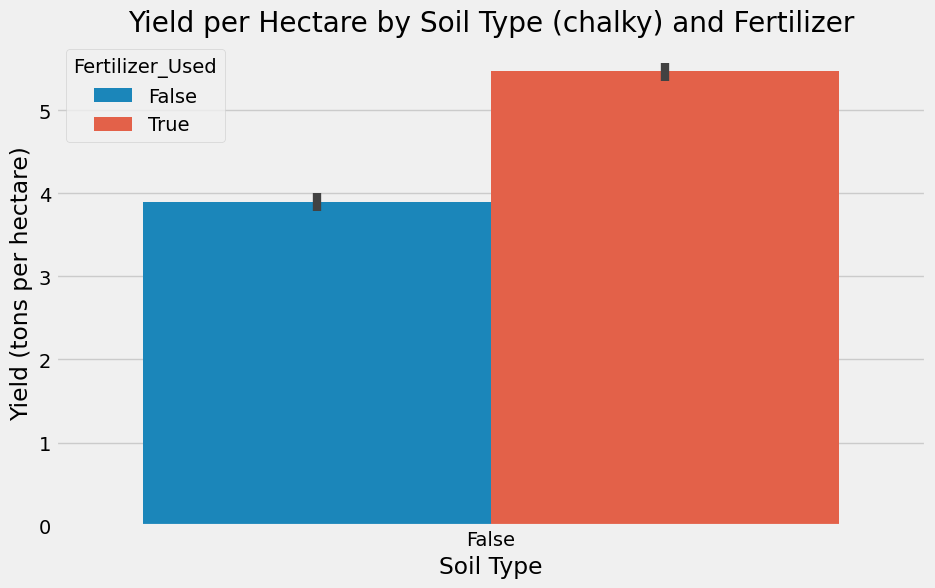

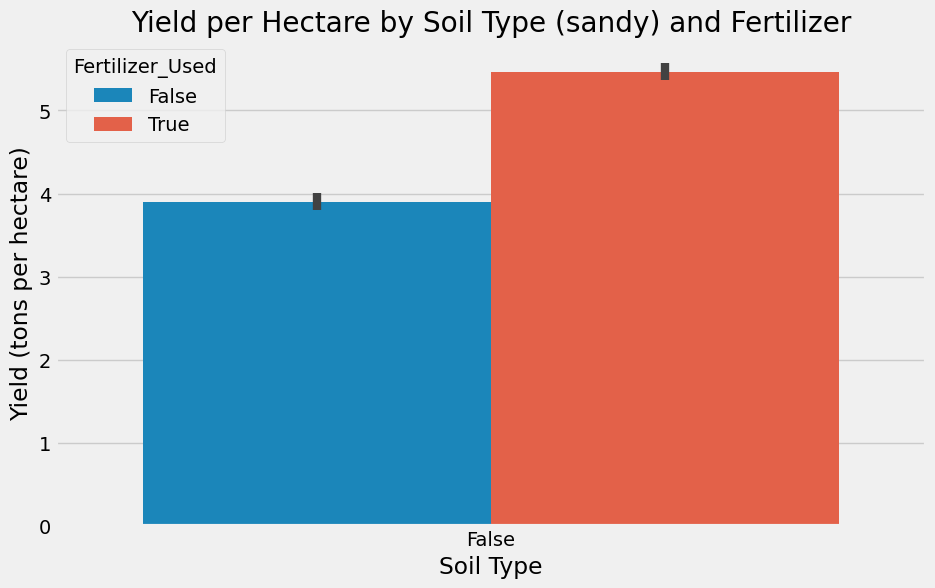

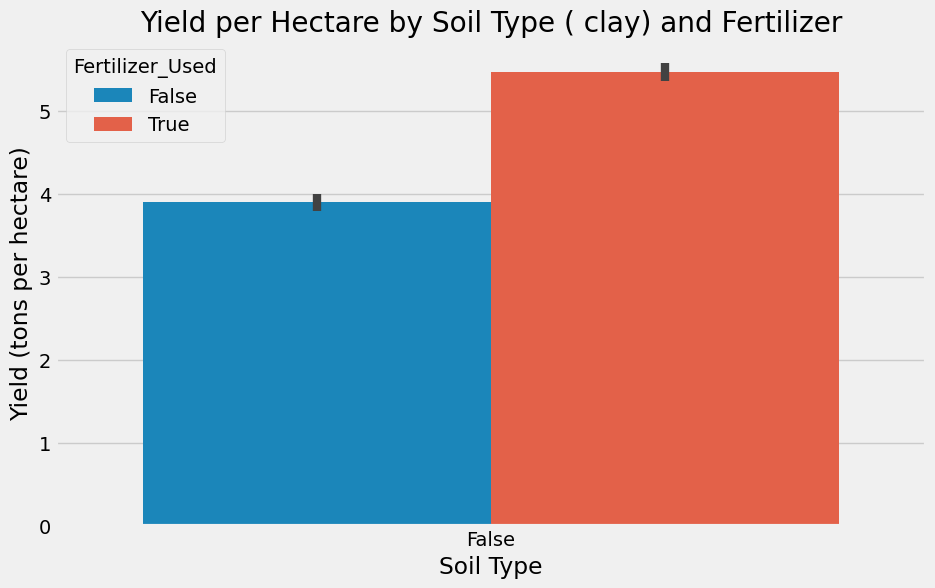

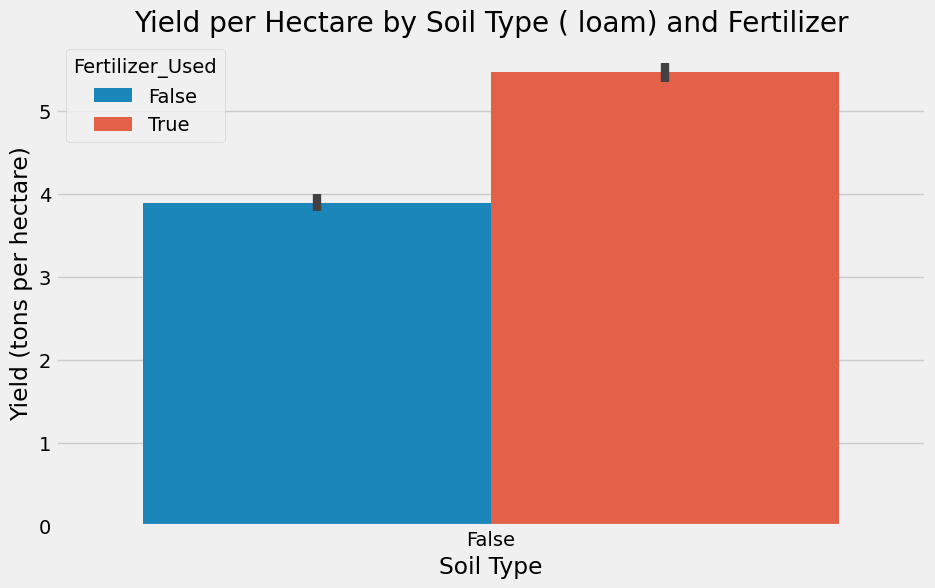

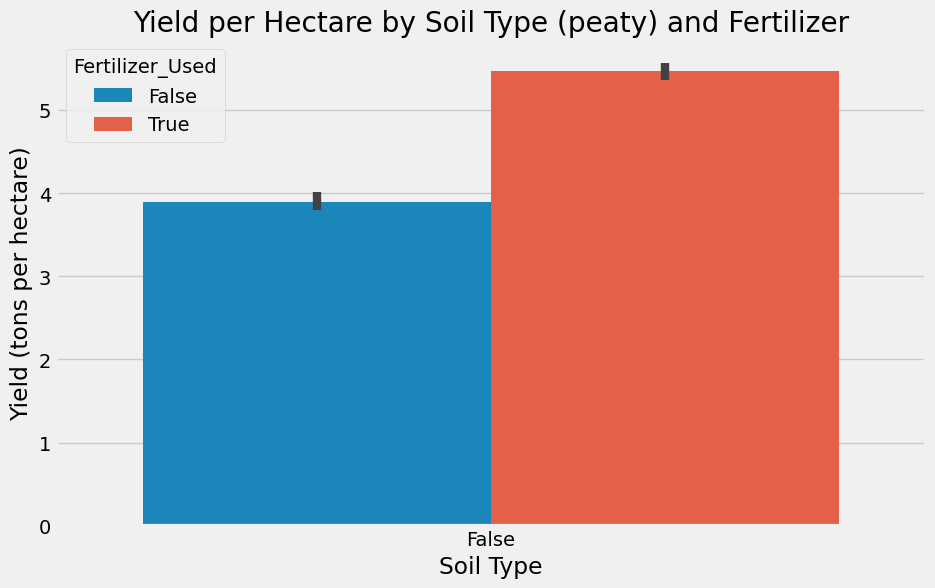

In [ ]:
soil_types = ['silt', 'chalky', 'sandy',' clay',' loam', 'peaty']

for soil_type in soil_types:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sampled_data, x=data['Soil_Type'] == soil_type, y='Yield_tons_per_hectare', hue='Fertilizer_Used')
    plt.title(f'Yield per Hectare by Soil Type ({soil_type}) and Fertilizer')
    plt.xlabel('Soil Type')
    plt.ylabel('Yield (tons per hectare)')
    plt.show()

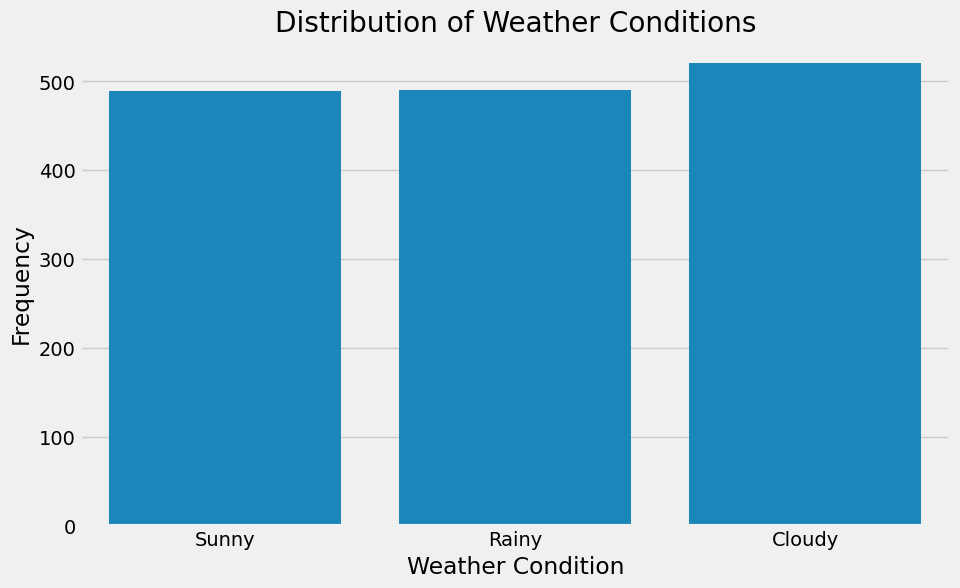

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sampled_data, x='Weather_Condition')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

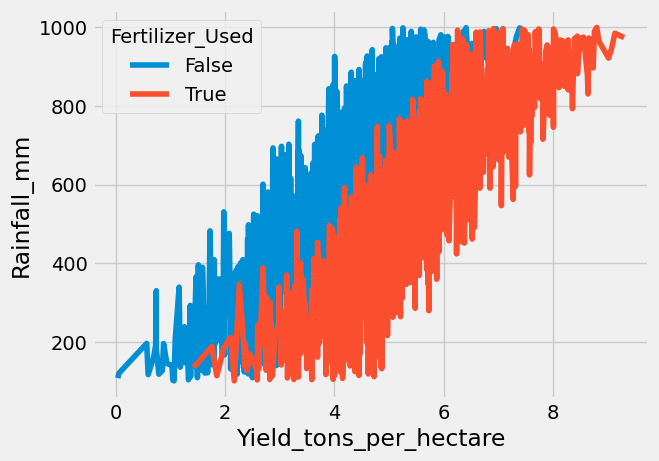

In [ ]:
sns.lineplot(x='Yield_tons_per_hectare', y = 'Rainfall_mm', hue='Fertilizer_Used', data = sampled_data)
plt.show()

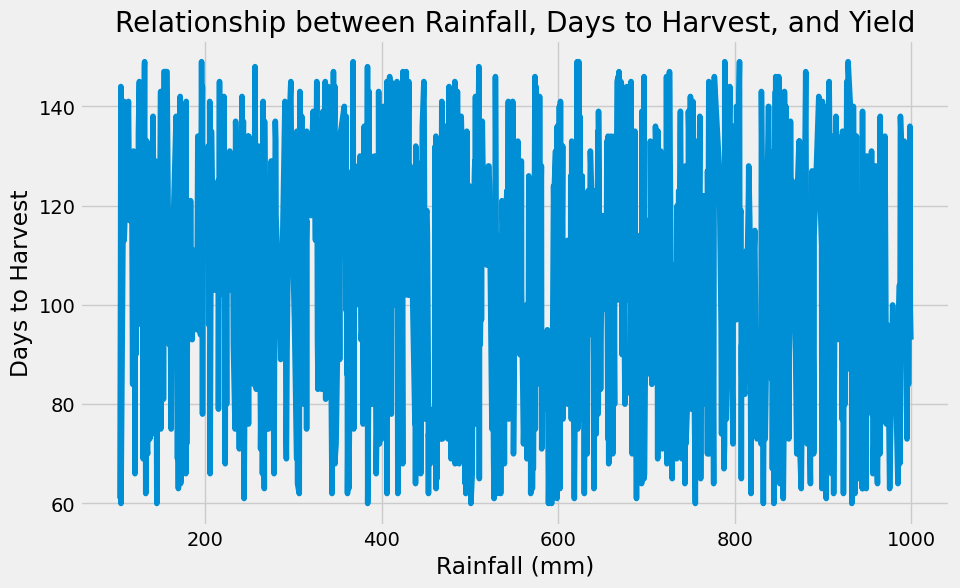

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rainfall_mm', y='Days_to_Harvest', data=sampled_data)
plt.title('Relationship between Rainfall, Days to Harvest, and Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Days to Harvest')
plt.show()

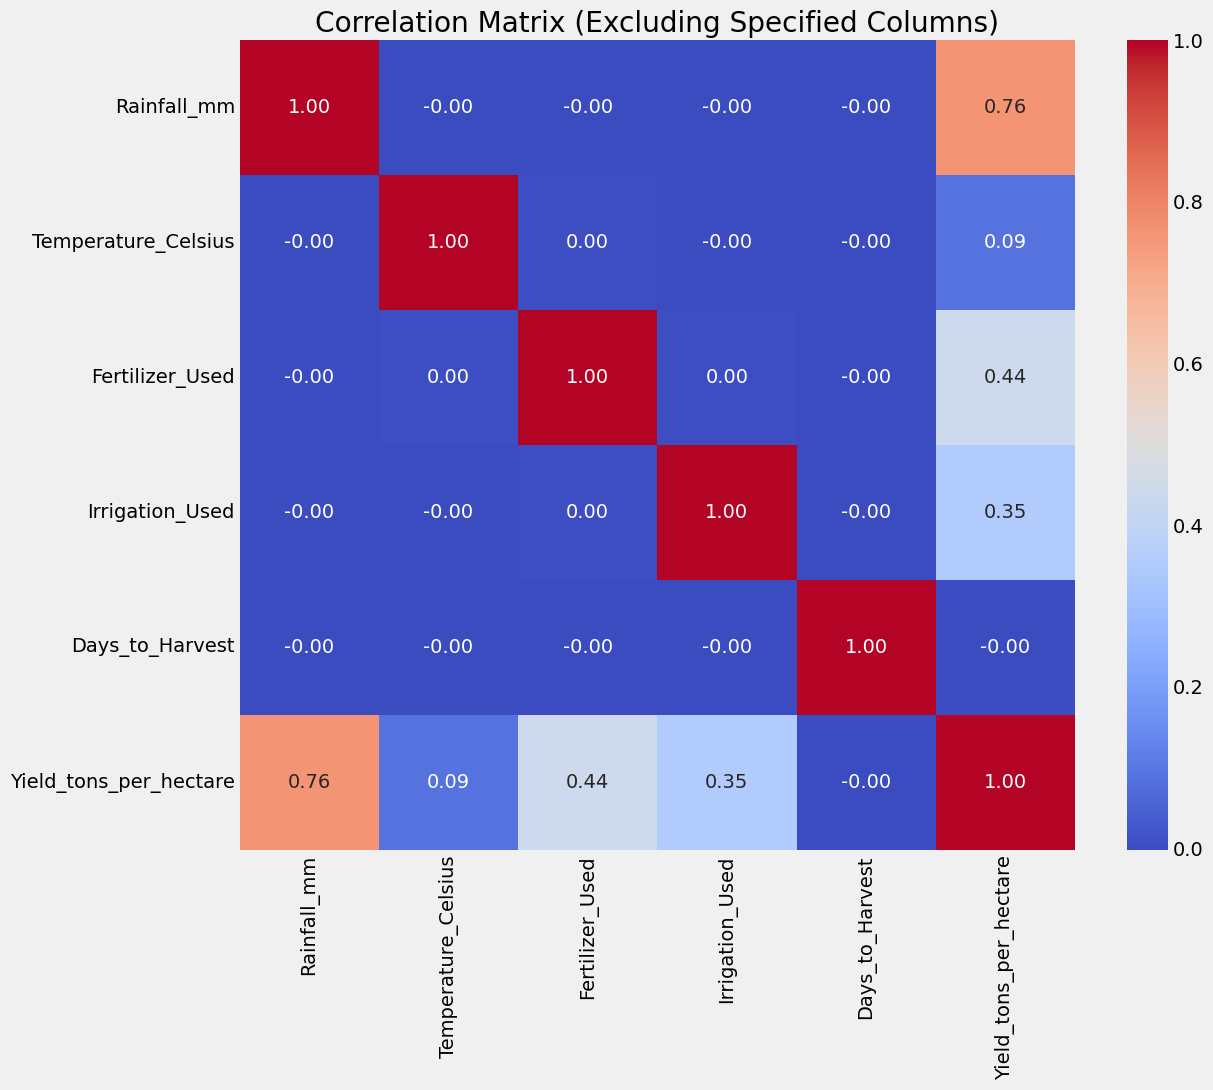

In [ ]:
cols_to_exclude = ['Region', 'Soil_Type', 'Weather_Condition', 'Crop']
cols_for_correlation = [col for col in data.columns if col not in cols_to_exclude]

correlation_matrix = data[cols_for_correlation].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Excluding Specified Columns)')
plt.show()

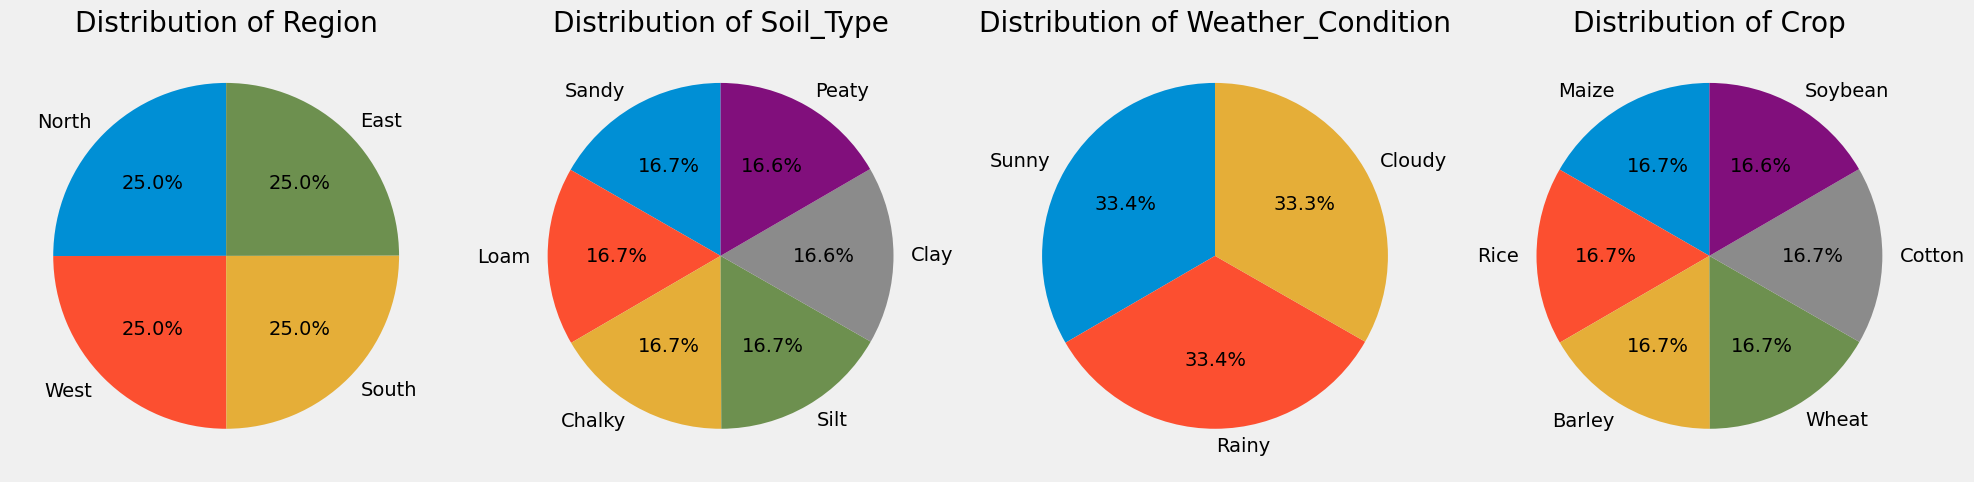

In [ ]:
cols_for_pie = ['Region', 'Soil_Type', 'Weather_Condition', 'Crop']

plt.figure(figsize=(20, 12))

for i, col in enumerate(cols_for_pie):
    plt.subplot(1, 4, i + 1)
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

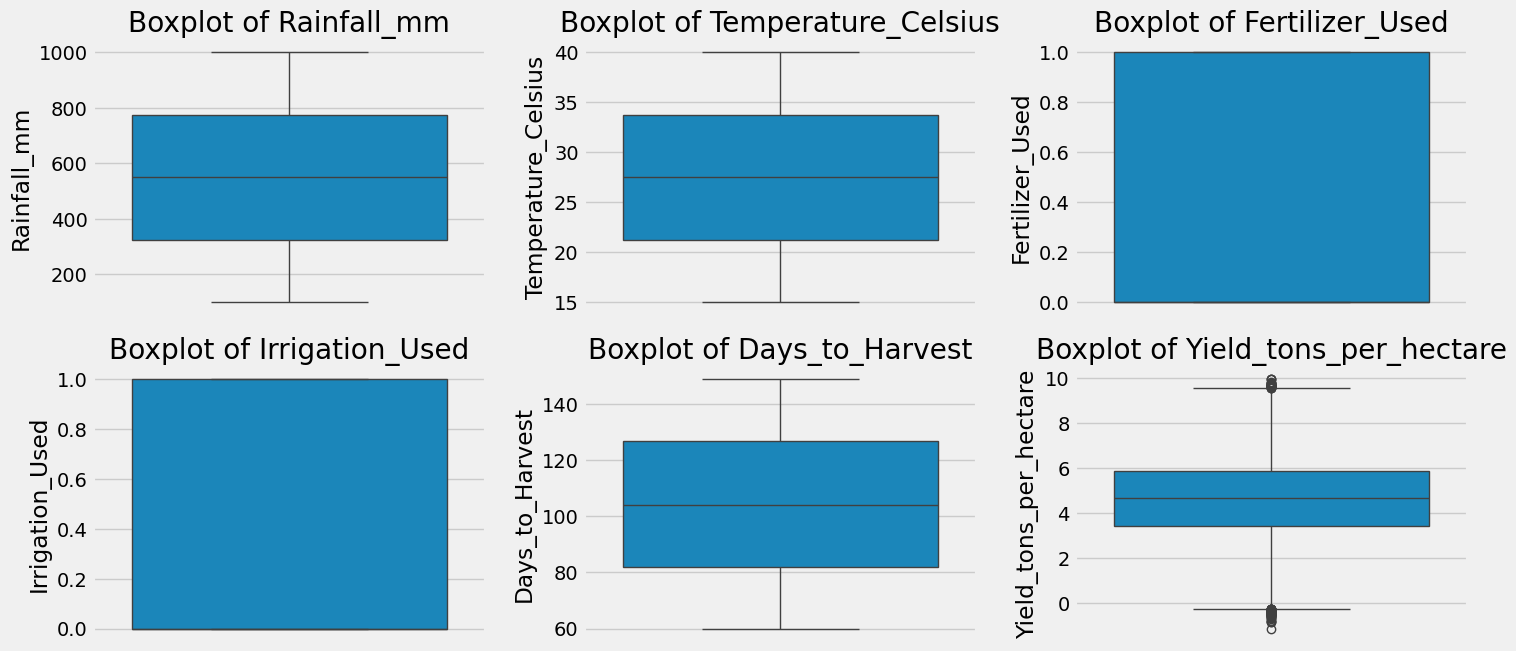

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_exclude = ['Region', 'Soil_Type', 'Weather_Condition', 'Crop']
cols_for_boxplot = [col for col in data.columns if col not in cols_to_exclude]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_for_boxplot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
data['log_Yield'] = np.log1p(data['Yield_tons_per_hectare'])
data.drop('Yield_tons_per_hectare', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data = pd.get_dummies(data, columns=['Region', 'Soil_Type', 'Weather_Condition'], drop_first=True)
data.head()

,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,log_Yield,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Weather_Condition_Rainy,Weather_Condition_Sunny
0,Cotton,897.077239,27.676966,False,True,122,2.022318,False,False,True,False,False,False,True,False,False,False
1,Rice,992.673282,18.026142,True,True,140,2.254166,False,True,False,True,False,False,False,False,True,False
2,Barley,147.998025,29.794042,False,False,106,0.754921,True,False,False,False,True,False,False,False,False,True
3,Soybean,986.866331,16.644190,False,True,146,2.017243,True,False,False,False,False,False,True,False,True,False
4,Wheat,730.379174,31.620687,True,True,110,2.110001,False,True,False,False,False,False,False,True,False,False


In [ ]:
X = data.drop('Crop', axis=1)
y = data['Crop']

X.shape, y.shape

((1000000, 16), (1000000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest:")
print(f"  Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print("  Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest:
  Accuracy: 0.168
  Classification Report:
              precision    recall  f1-score   support

      Barley       0.17      0.18      0.17     33472
      Cotton       0.17      0.17      0.17     33239
       Maize       0.17      0.17      0.17     33411
        Rice       0.17      0.17      0.17     33284
     Soybean       0.17      0.16      0.16     33480
       Wheat       0.17      0.16      0.16     33114

    accuracy                           0.17    200000
   macro avg       0.17      0.17      0.17    200000
weighted avg       0.17      0.17      0.17    200000



In [ ]:
results_df = pd.DataFrame({'Actual_Yield': y_test, 'Predicted_Yield': rf_pred})

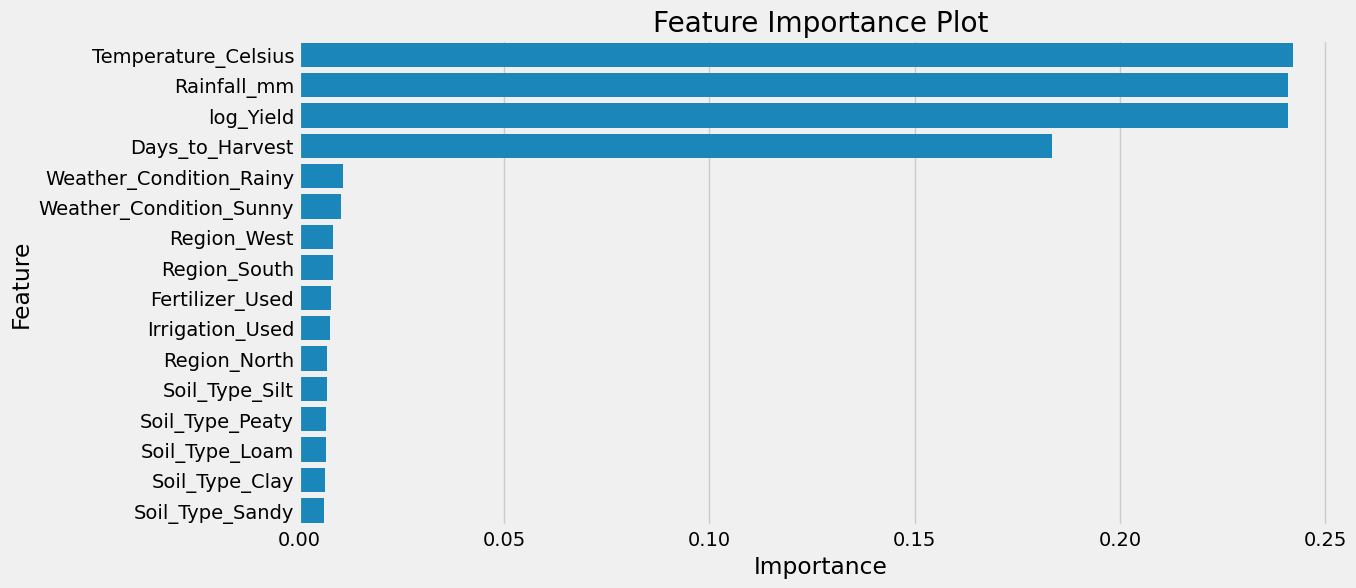

In [ ]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

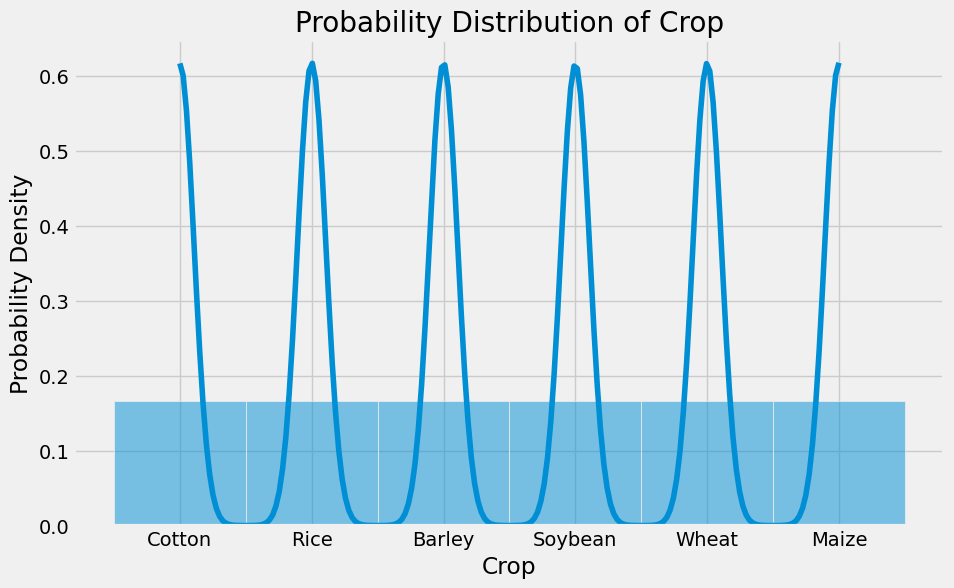

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Crop'], kde=True, stat="density", common_norm=False)
plt.title('Probability Distribution of Crop')
plt.xlabel('Crop')
plt.ylabel('Probability Density')
plt.show()

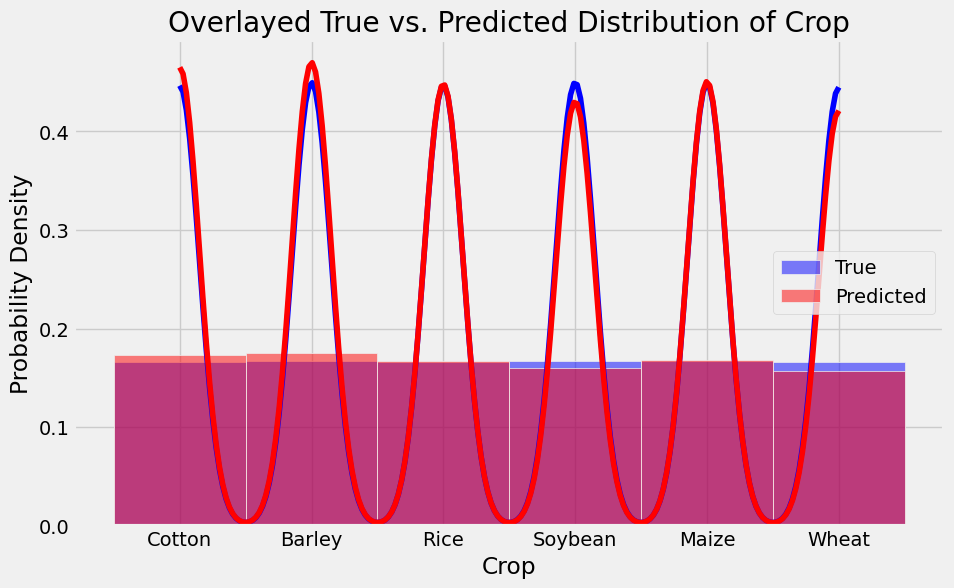

In [ ]:
plot_df = pd.DataFrame({'True_Crop': y_test, 'Predicted_Crop': rf_pred})

plt.figure(figsize=(10, 6))
sns.histplot(data=plot_df, x='True_Crop', color='blue', label='True', kde=True, stat="density", common_norm=False)
sns.histplot(data=plot_df, x='Predicted_Crop', color='red', label='Predicted', kde=True, stat="density", common_norm=False)
plt.title('Overlayed True vs. Predicted Distribution of Crop')
plt.xlabel('Crop')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
y_pred = rf_pred  # Your model's predictions
y_true = y_test  # True target values

# Use classification metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate Precision
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

# Calculate Recall
recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

# Calculate F1-score
f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

# Print the classification metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.168
Precision: 0.168
Recall: 0.168
F1-score: 0.168
